<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data-into-Pandas" data-toc-modified-id="Load-Data-into-Pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data into Pandas</a></span></li><li><span><a href="#Basic-Properties-of-the-Dataset" data-toc-modified-id="Basic-Properties-of-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic Properties of the Dataset</a></span></li><li><span><a href="#Exploring-Column-Summaries" data-toc-modified-id="Exploring-Column-Summaries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring Column Summaries</a></span><ul class="toc-item"><li><span><a href="#Summary-for-Categorical-Features" data-toc-modified-id="Summary-for-Categorical-Features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Summary for Categorical Features</a></span></li><li><span><a href="#Summary-for-Numerical-Features" data-toc-modified-id="Summary-for-Numerical-Features-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Summary for Numerical Features</a></span></li></ul></li><li><span><a href="#Exploring-Text-Categories" data-toc-modified-id="Exploring-Text-Categories-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring Text Categories</a></span><ul class="toc-item"><li><span><a href="#Visualizing-Frequency-Distributions" data-toc-modified-id="Visualizing-Frequency-Distributions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Visualizing Frequency Distributions</a></span></li></ul></li><li><span><a href="#Exploring-Word-Frequencies" data-toc-modified-id="Exploring-Word-Frequencies-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploring Word Frequencies</a></span><ul class="toc-item"><li><span><a href="#Creating-a-List-of-Tokens-from-a-List-of-Documents" data-toc-modified-id="Creating-a-List-of-Tokens-from-a-List-of-Documents-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Creating a List of Tokens from a List of Documents</a></span></li><li><span><a href="#Counting-Frequencies-with-a-Counter" data-toc-modified-id="Counting-Frequencies-with-a-Counter-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Counting Frequencies with a Counter</a></span></li><li><span><a href="#Using-Word-Clouds" data-toc-modified-id="Using-Word-Clouds-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Using Word Clouds</a></span></li></ul></li><li><span><a href="#Exploring-Text-Complexity" data-toc-modified-id="Exploring-Text-Complexity-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploring Text Complexity</a></span></li></ul></div>

# Modern Text Mining with Python (Part 2 of 5):<br>Data Exploration with Pandas

This notebook contains the code examples for the blog post on [Medium.com](https://medium.com/@datanizing/modern-text-mining-with-python-part-2-of-5-data-exploration-with-pandas-ee3456cf6a4?source=friends_link&sk=15387fd5091b35359cef54af3ad7ae6f).

To get it running, you will need the SQLite Database `selfposts.db`, which was created in the first notebook of this series.

## Library Import & Settings<div class='tocSkip'>

In [1]:
# filter warnings on depreciation etc.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import pandas, numpy
import pandas as pd
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [3]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

## Load Data into Pandas

In [4]:
import sqlite3

sql = """
SELECT p.*, 
       c.category_1 as category, c.category_2 as subcategory
FROM posts_nlp p, categories c
WHERE p.subreddit = c.subreddit
"""

with sqlite3.connect('selfposts.db') as con:
    df = pd.read_sql_query(sql, con)

## Basic Properties of the Dataset

In [5]:
# list column names and datatypes
df.dtypes

index                  int64  
id                     object 
subreddit              object 
title                  object 
selftext               object 
selftext_clean         object 
selftext_lemma         object 
selftext_nouns         object 
selftext_adjectives    object 
selftext_verbs         object 
selftext_nav           object 
no_tokens              float64
category               object 
subcategory            object 
dtype: object

In [6]:
# select a sample of some data frame columns
df[['id', 'subreddit', 'title', 'selftext_clean']] \
  .sample(2, random_state=42)

,id,subreddit,title,selftext_clean
333618,6gjflh,danganronpa,DanganRonpa RP,"Hello all! Just another DanganRonpa RPer here! Or a host rather, which is what I'm here to talk about. My friend and I are hosting a danganronpa RP on discord and we are looking to recruit new players! If you're interested, here is the link: [DanganRonpa Roleplay]"
850501,5fitbd,Charity,Can you people help me to raise a few hundred bucks?,"I, a computer science and Engineering student from India now turned out to be a no computer engineering student. \n\nMy dad is so old and dont have any savings couldnt help me to buy a computer. If you people could help me raise a few hundred bucks, I would be very grateful to you. \n\nNB: I will pay everyone back if you need it back when I start to earn. After 2.5 years\n\nI dont know whether you will see this, Please help me if you wish to"


In [7]:
# length of a dataframe
len(df)

1013000

In [8]:
# number of values per column
df.count()

index                  1013000
id                     1013000
subreddit              1013000
title                  1013000
selftext               1013000
selftext_clean         1013000
selftext_lemma         1013000
selftext_nouns         1013000
selftext_adjectives    1013000
selftext_verbs         1013000
selftext_nav           1013000
no_tokens              1013000
category               1013000
subcategory            1013000
dtype: int64

In [9]:
# size info, including memory consumption
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013000 entries, 0 to 1012999
Data columns (total 14 columns):
index                  1013000 non-null int64
id                     1013000 non-null object
subreddit              1013000 non-null object
title                  1013000 non-null object
selftext               1013000 non-null object
selftext_clean         1013000 non-null object
selftext_lemma         1013000 non-null object
selftext_nouns         1013000 non-null object
selftext_adjectives    1013000 non-null object
selftext_verbs         1013000 non-null object
selftext_nav           1013000 non-null object
no_tokens              1013000 non-null float64
category               1013000 non-null object
subcategory            1013000 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 4.2 GB


## Exploring Column Summaries

The pandas `describe` method computes statistical summaries for each of the columns of a dataframe. The results are different for categorical and numerical features.

### Summary for Categorical Features

In [10]:
columns = [col for col in df.columns if not col.startswith('self')]
columns

['index', 'id', 'subreddit', 'title', 'no_tokens', 'category', 'subcategory']

In [11]:
# describe categorical columns of type np.object 
df[['category', 'subcategory', 'subreddit']] \
  .describe(include=np.object) \
  .transpose()

,count,unique,top,freq
category,1013000,39,video_game,100000
subcategory,1013000,1013,fibromylgia,1000
subreddit,1013000,1013,Nest,1000


In [12]:
df['subreddit'].value_counts()[:10]

Nest              1000
Snus              1000
Schizoid          1000
intel             1000
Hyundai           1000
SCREENPRINTING    1000
mead              1000
snapchat          1000
AutoModerator     1000
Professors        1000
Name: subreddit, dtype: int64

### Summary for Numerical Features

In [13]:
# describe numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,1013000.00,506499.50,292428.06,0.00,253249.75,506499.50,759749.25,1012999.00
no_tokens,1013000.00,168.36,135.37,1.00,82.00,120.00,199.00,2103.00


## Exploring Text Categories

In [14]:
# number of unique values = count distinct
df['category'].nunique()

39

In [15]:
# group by category, count distinct subreddits and posts
cat_df = df.groupby('category') \
           .agg({'subreddit': pd.Series.nunique,
                 'id': pd.Series.count}) \
           .rename(columns={'subreddit': 'num_subreddits',
                            'id': 'num_posts'}) \
           .sort_values('num_subreddits', ascending=False)
            
# show top 5 records
cat_df.head(5)

,num_subreddits,num_posts
category,,
video_game,100,100000
tv_show,68,68000
health,58,58000
profession,56,56000
software,52,52000


In [16]:
cat_df.describe()

,num_subreddits,num_posts
count,39.00,39.00
mean,25.97,25974.36
std,19.76,19759.72
min,5.00,5000.00
25%,13.50,13500.00
50%,20.00,20000.00
75%,29.50,29500.00
max,100.00,100000.00


### Visualizing Frequency Distributions

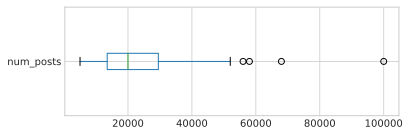

In [17]:
# horizontal boxplot of a dataframe column
cat_df[['num_posts']].plot(kind='box', vert=False, figsize=(6, 2));

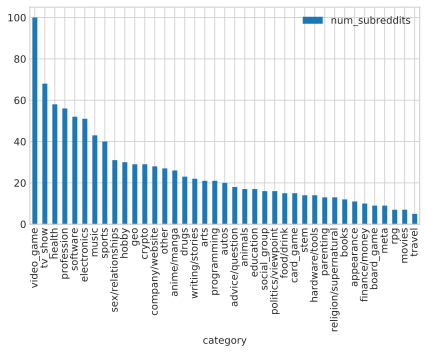

In [18]:
# bar chart of a dataframe column
cat_df[['num_subreddits']].plot(kind='bar', figsize=(7,4));

## Exploring Word Frequencies

In [19]:
# create a data frame slice
sub_df = df[df['subreddit']=='TheSimpsons']

# sample cleaned text and tokens tagged as nouns
sub_df[['selftext_clean', 'selftext_nouns']].sample(2)

,selftext_clean,selftext_nouns
244856,I tried to list them out and I can't quite find a way to put it all together.\n\nThe following list feels a little overgenerous in some ways but still only gets to 21.\n\n1 Frame narrative\n\n2 Apu parties\n\n3 Lisa hair escapade\n\n4 Burn cycling\n\n5 Dr. Nick board meeting\n\n6 Grandpa medical crisis\n\n7 Barney’s tab\n\n8 Snake robs Moe\n\n9 Skinner and Chalmers\n\n10 Agnus in a burning house\n\n11 Maggie in newspaper machine\n\n12 Pulp Fiction McDonalds\n\n13 Telemundo guy at home\n\n14 Pulp Fiction part 2\n\n15 Lovejoy hates Flanders\n\n16 Cletus\n\n17 Comic Book shop\n\n18 Milhouse in pawn shop\n\n19 Nelson accosts cat lady\n\n20 Nelson gets comeuppance\n\n21 Frink\n\nWhat's wrong?,way list way frame narrative apu party lisa hair escapade cycling dr. nick board meeting grandpa crisis barney tab snake moe skinner chalmers agnus house maggie newspaper machine pulp fiction mcdonalds telemundo guy home pulp fiction part lovejoy flanders cletus comic book shop milhouse pawn shop nelson cat lady nelson comeuppance frink what
900447,Hey all -\n\nI'm trying to get the Simpsons World App (FXNOW) to work on my Samsung Smart TV - but apparently Comcast Xfinity is the only provider that you can't stream with? Has anyone else had this problem - What's the deal here??\n\nIf any of you know a workaround or a solution - I would love to rewatch the entire series yet again.,simpsons world app fxnow samsung smart tv comcast xfinity provider anyone problem what deal workaround solution series


### Creating a List of Tokens from a List of Documents

In [20]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [21]:
# transform list of documents into a single list of tokens
tokens = sub_df.selftext_nouns.map(my_tokenizer).sum()

In [22]:
print(tokens[:200])

['episode', 'time', 'other', 'instance', 'proposal', 'putlocker', 'week', 'tv', 'bart', 'thanksgiving', 'episode', 'other', 'show', 'girlfriend', 'who', 'kid', 'point', 'go', 'show', 'movie', 'thing', 'reference', 'continuity', 'quality', 'reference', 'back', 'movie', 'season', 'who', 'shot', 'mr.', 'burns', 'consequence', 'callback', 'order', 'problem', 'quality', 'matching', 'movie', 'lot', 'episode', 'show', 'point', 'season', 'dip', 'movie', 'end', 'cap', 'movie', 'cartooniness', 'vibe', 'show', 'hour', 'episode', 'head', 'while', 'guy', 'hope', 'year', 'lisa', 'creepy', 'boy', 'who', 'school', 'parent', 'stuff', 'episode', 'treehouse', 'horror', 'anything', 'anyone', 'idea', 'what', 'idea', 'episode', 'elijah', 'wood', 'guest', 'show', 'post', 'what', 'time', 'episode', 'episode', 'homer', 'city', 'new', 'york', 'season', 'episode', 'youtube', 'min', 'clip', 'homer', 'car', 'garage', 'marge', 'homer', 'chore', 'paper', 'car', 'episode', 'name', 'episode', 'homer', 'bully', 'kearne

### Counting Frequencies with a Counter

In [23]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('episode', 1227),
 ('homer', 613),
 ('season', 582),
 ('simpsons', 550),
 ('what', 436),
 ('show', 338),
 ('bart', 334),
 ('simpson', 268),
 ('something', 251),
 ('time', 222),
 ('lisa', 221),
 ('anyone', 221),
 ('character', 216),
 ('who', 212),
 ('scene', 211),
 ('year', 198),
 ('marge', 190),
 ('guy', 166),
 ('thing', 142),
 ('people', 142)]

In [24]:
df.category.unique()

array(['writing/stories', 'tv_show', 'autos', 'hardware/tools',
       'electronics', 'video_game', 'crypto', 'sports', 'hobby',
       'appearance', 'card_game', 'drugs', 'advice/question',
       'social_group', 'anime/manga', 'sex/relationships', 'software',
       'health', 'other', 'animals', 'arts', 'programming', 'rpg',
       'books', 'parenting', 'education', 'company/website', 'profession',
       'music', 'politics/viewpoint', 'stem', 'travel', 'geo',
       'religion/supernatural', 'board_game', 'movies', 'food/drink',
       'finance/money', 'meta'], dtype=object)

In [25]:
print([t[0] for t in counter.most_common(200)])   

['episode', 'homer', 'season', 'simpsons', 'what', 'show', 'bart', 'simpson', 'something', 'time', 'lisa', 'anyone', 'character', 'who', 'scene', 'year', 'marge', 'guy', 'thing', 'people', 'joke', 'one', 'family', 'way', 'thank', 'game', 'someone', 'day', 'springfield', 'idea', 'fan', 'lot', 'burns', 'kid', 'name', 'line', 'tv', 'everyone', 'series', 'clip', 'life', 'help', 'point', 'movie', 'man', 'head', 'anything', 'song', 'dvd', 'moe', 'quote', 'reference', 'end', 'part', 'friend', 'skinner', 'reason', 'story', 'moment', 'krusty', 'writer', 'horror', 'car', 'school', 'version', 'place', 'maggie', 'house', 'nothing', 'apu', 'question', 'mr.', 'voice', 'bit', 'example', 'post', 'ned', 'bob', 'book', 'quality', 'stuff', 'today', 'money', 'future', 'world', 'person', 'gag', 'age', 'fox', 'everything', 'flanders', 'face', 'number', 'thought', 'list', 'advance', 'treehouse', 'video', 'memory', 'mother', 'job', 'christmas', 'plot', 'issue', 'dad', 'mr', 'couch', 'town', 'opinion', 'milhou

In [26]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

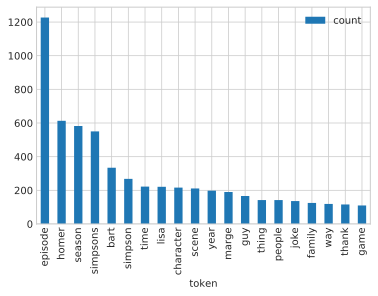

In [27]:
# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token');

### Using Word Clouds

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

In [29]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

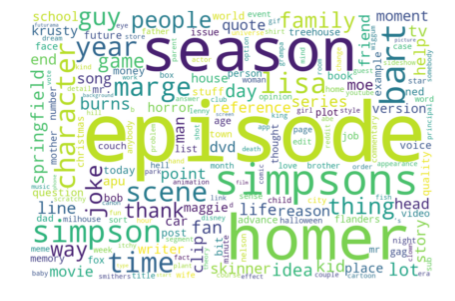

In [30]:
# create wordcloud
wordcloud(counter)

**Comparing to Sopranos**

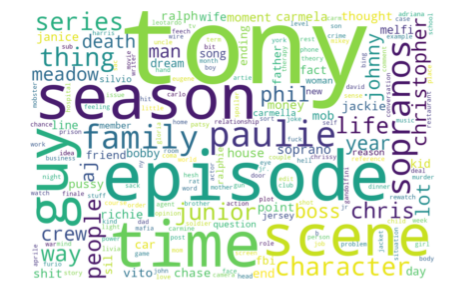

In [31]:
tokens2 = df[df['subreddit']=='thesopranos'].selftext_nouns \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

## Exploring Text Complexity


In [32]:
df['no_tokens'] = df.selftext_lemma\
  .map(lambda l: 0 if l==None else len(l.split()))

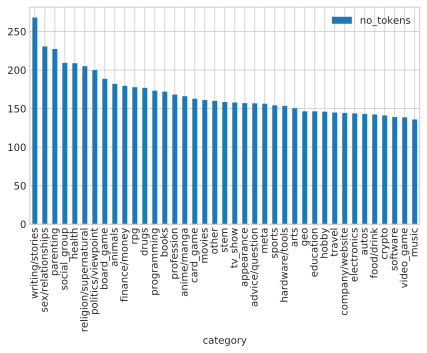

In [33]:
# mean number of tokens by category
df.groupby(['category']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

In [34]:
# render plots as retina or png, because svg is very slow
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

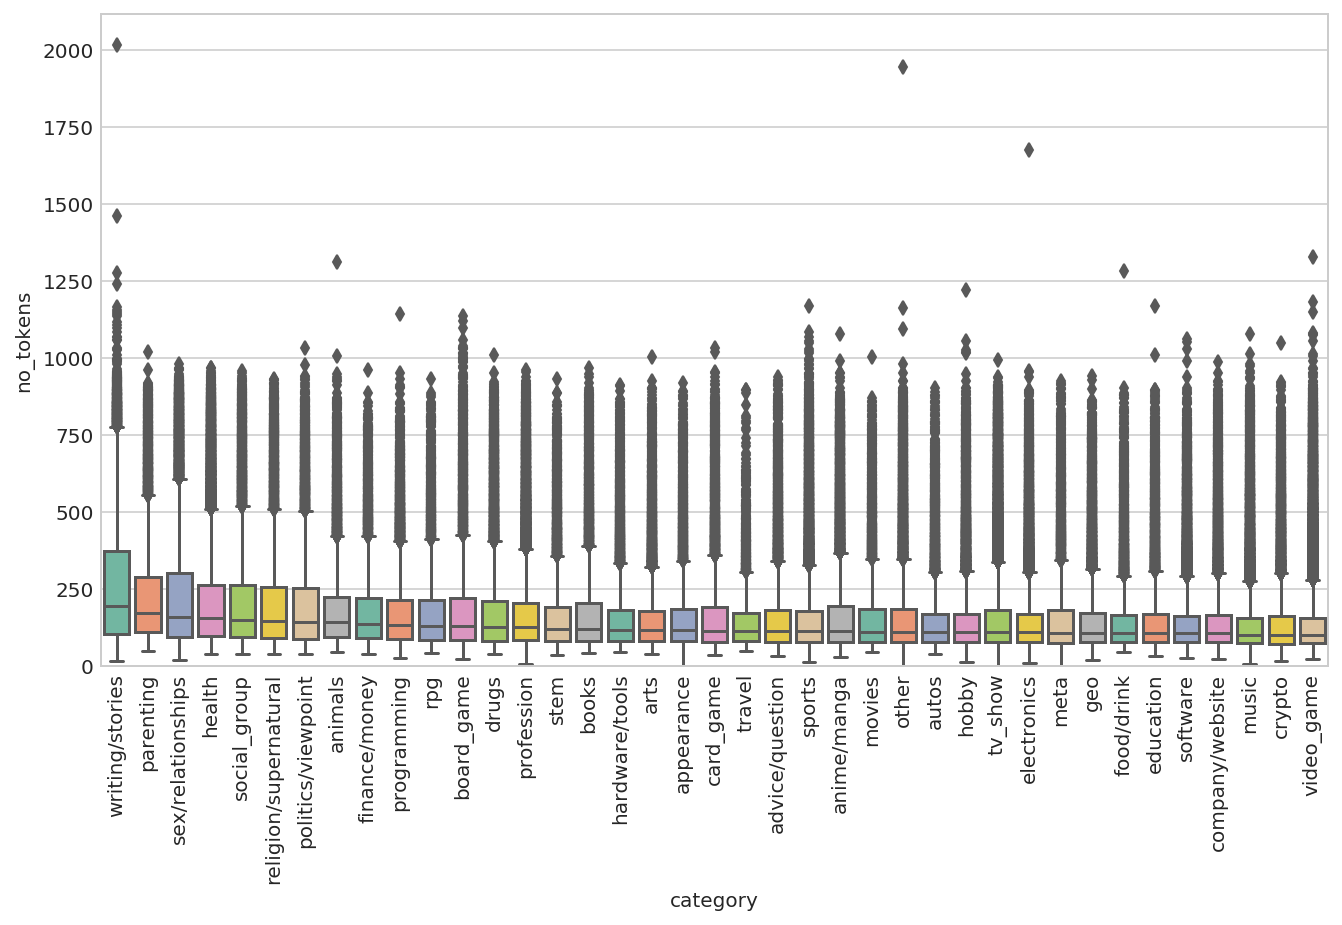

In [35]:
multi_boxplot(df, 'category', 'no_tokens');

In [36]:
# print text of outliers
df['selftext_lemma'][df.no_tokens > 1500]

237498    here be a ikev1 site to site tunnel -PRON- have set up . \n\n asa1 \n\n define object * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * \n object network obj 172.29.2.0 \n \isubnet 172.29.2.0 \n\n object network obj 192.168.80.0 \n \isubnet 192.168.80.0 \n\n nat exemption * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * \n nat ( inside , outside ) static obj 192.168.80.0 obj 192.168.80.0 destination static obj 172.29.2.0 obj 172.29.2.0 \n\n acl * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * \n access - list motivity acl extended permit ip 192.168.80.0 255.255.255.0 172.29.2.0 255.255.255.0 \n access - list moti

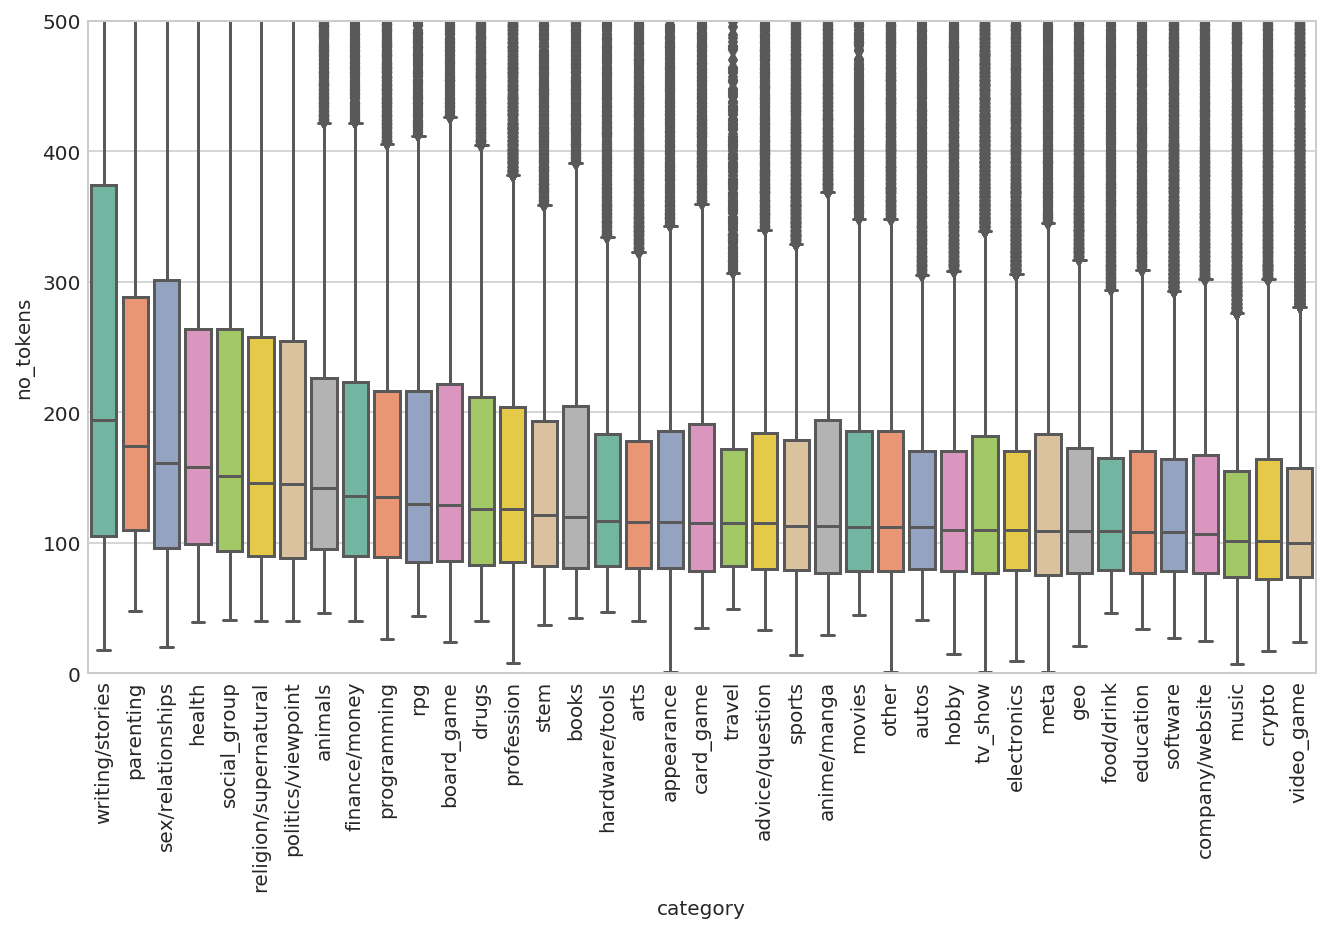

In [37]:
# cut-off diagram at y=500
multi_boxplot(df, 'category', 'no_tokens', ylim=500)

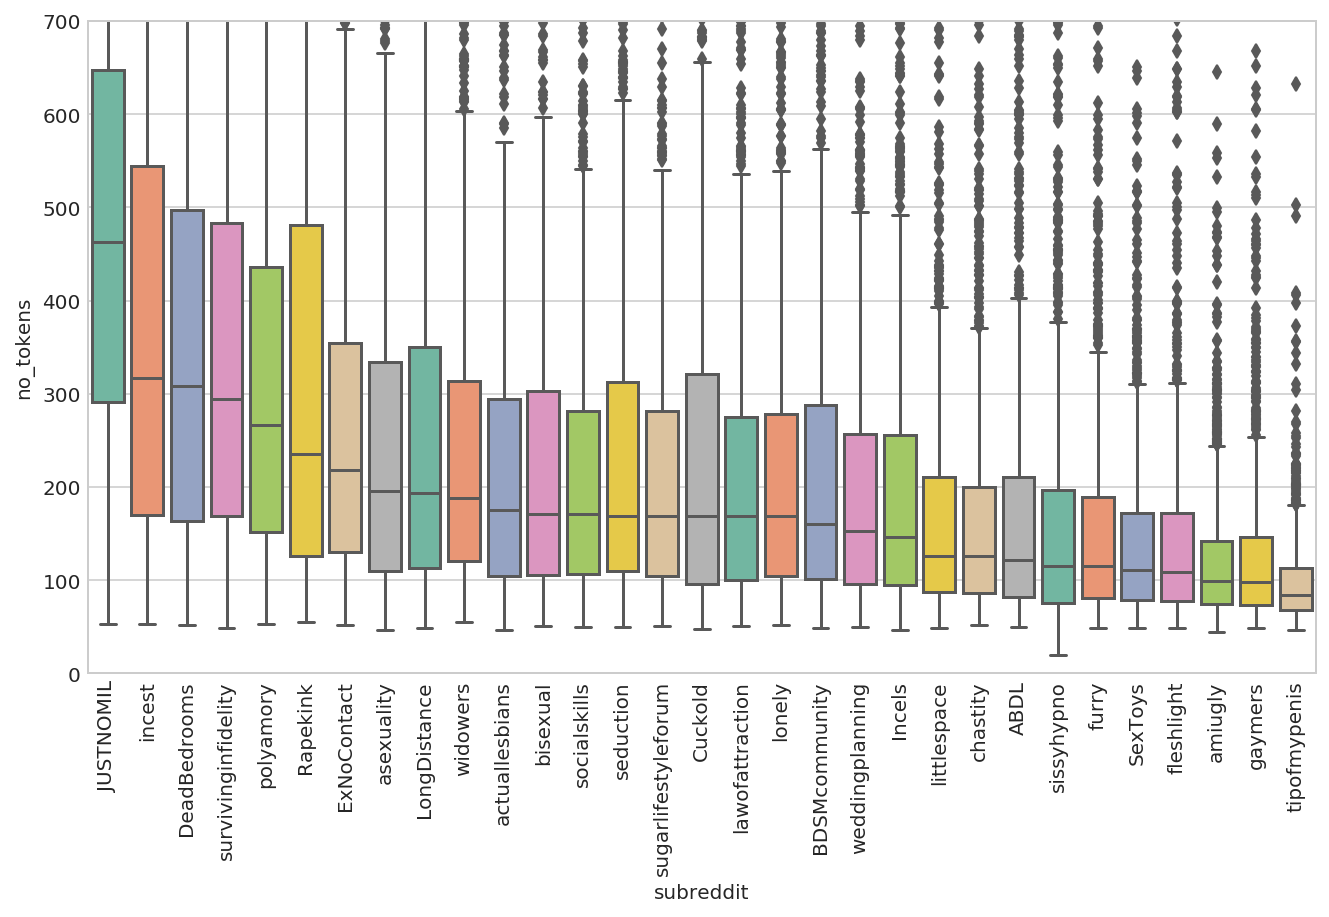

In [38]:
# comparing subreddits within a single category
multi_boxplot(df[df.category=='sex/relationships'], 
              'subreddit', 'no_tokens', ylim=700)